## Install the package dependencies before running this notebook

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob

"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

In [2]:
!pwd

/Users/Muchan/Desktop/UCSD-2021-2022/CSE151B/competition local/argo2


## Create a Torch.Dataset class for the training dataset

In [3]:
from glob import glob
import pickle
import numpy as np

# ROOT_PATH = "./argo2/"
ROOT_PATH = "/Users/Muchan/Desktop/UCSD-2021-2022/CSE151B/competition local/argo2/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

## Create a DataLoader class for training

In [4]:
batch_sz = 4  # batch size 
train_loader = DataLoader(train_dataset,batch_size=batch_sz)

## Sample a batch of data and visualize 

In [5]:
import matplotlib.pyplot as plt
import random


def show_sample_batch(sample_batch):
    """visualize the trajectory for a batch of samples"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i,:,0], inp[i,:,1], color='orange')
        axs[i].scatter(out[i,:,0], out[i,:,1], color='blue')

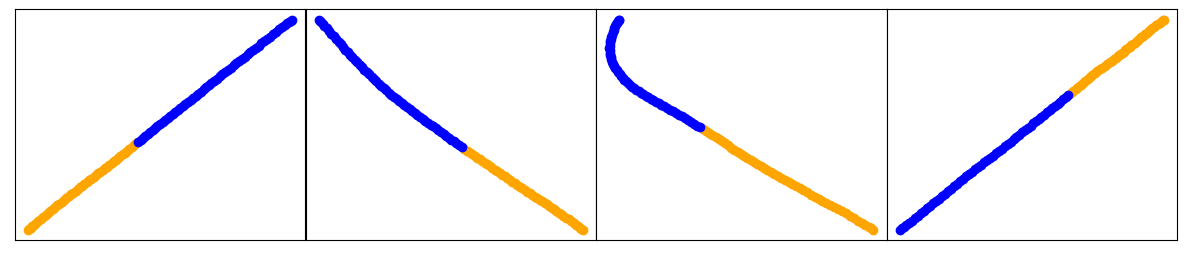

In [6]:
for i_batch, sample_batch in enumerate(train_loader):
    inp, out = sample_batch
    """
    TODO:
      implement your Deep learning model
      implement training routine
    """
    show_sample_batch(sample_batch)
    break
plt.show()

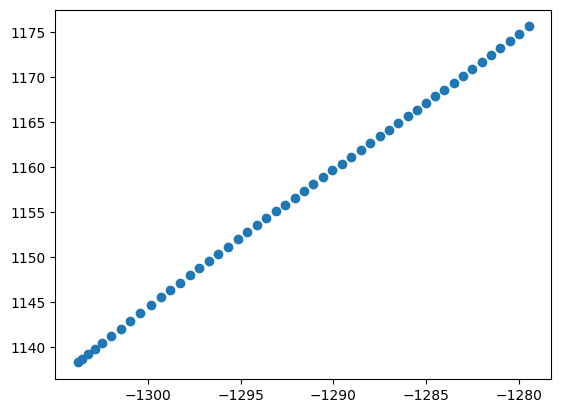

In [7]:
# from scene 1 in Palo Alto
sample_data = train_dataset.__getitem__(0)
sample_training_data = sample_data[0]
plt.scatter(sample_training_data[:,0], sample_training_data[:,1])
plt.show()

(50, 2)
(60, 2)


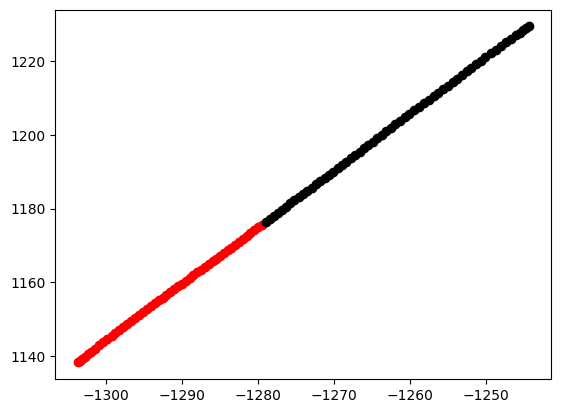

In [8]:
sample_output_data = sample_data[1]
plt.scatter(sample_training_data[:,0], sample_training_data[:,1], color = 'red')
print(sample_training_data.shape)
plt.scatter(sample_output_data[:,0], sample_output_data[:,1], color='black')
print(sample_output_data.shape)
plt.show()

In [9]:
palo_alto_input_coordinates = []
palo_alto_output_coordinates = []
for i in range(len(train_dataset.inputs)):
    palo_alto_input_coordinates.extend(train_dataset.__getitem__(i)[0])
    palo_alto_output_coordinates.extend(train_dataset.__getitem__(i)[1])
palo_alto_input_coordinates[:10]

[array([-1303.7625276 ,  1138.31246403]),
 array([-1303.51742401,  1138.71707532]),
 array([-1303.21204952,  1139.21904709]),
 array([-1302.84823902,  1139.8161695 ]),
 array([-1302.42992386,  1140.50078551]),
 array([-1301.96188374,  1141.26262409]),
 array([-1301.4558762 ,  1142.08314552]),
 array([-1300.92593051,  1142.94096098]),
 array([-1300.38289221,  1143.81733833]),
 array([-1299.83693982,  1144.69344162])]

In [10]:
palo_alto_output_coordinates[:10]

[array([-1278.98946703,  1176.46379179]),
 array([-1278.46830326,  1177.26701189]),
 array([-1277.93900418,  1178.07955857]),
 array([-1277.40596088,  1178.89819306]),
 array([-1276.87054225,  1179.72040311]),
 array([-1276.33324687,  1180.54976543]),
 array([-1275.79223373,  1181.38641966]),
 array([-1275.24483111,  1182.22997074]),
 array([-1274.68802746,  1183.08268521]),
 array([-1274.12108694,  1183.9435079 ])]

In [11]:
len(train_dataset.inputs)

11993

In [12]:
len(train_dataset.outputs)

11993

In [13]:
print(len(palo_alto_input_coordinates))
# should be the above / 50
print(len(train_dataset.inputs))

599650
11993


In [14]:
print(len(palo_alto_output_coordinates))
# should be above / 60
print(len(train_dataset.outputs))

719580
11993


In [15]:
import seaborn as sns
from tqdm import tqdm

In [16]:
palo_alto_input_coordinates = np.array(palo_alto_input_coordinates)
palo_alto_output_coordinates = np.array(palo_alto_output_coordinates)
palo_alto_input_coordinates

array([[-1303.7625276 ,  1138.31246403],
       [-1303.51742401,  1138.71707532],
       [-1303.21204952,  1139.21904709],
       ...,
       [-1240.42769846,  2681.10002881],
       [-1239.35167098,  2681.47356225],
       [-1238.24047602,  2681.86172194]])

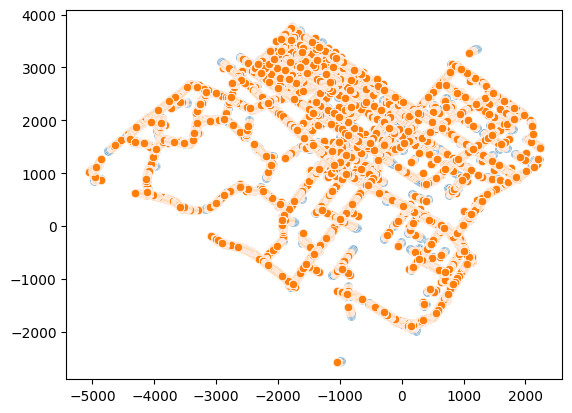

In [17]:
# looks very much like a map of Palo Alto
sns.scatterplot(x=palo_alto_input_coordinates[:,0], y=palo_alto_input_coordinates[:,1], alpha=0.25)
sns.scatterplot(x=palo_alto_output_coordinates[:,0], y=palo_alto_output_coordinates[:,1], alpha = 0.85)
plt.show()

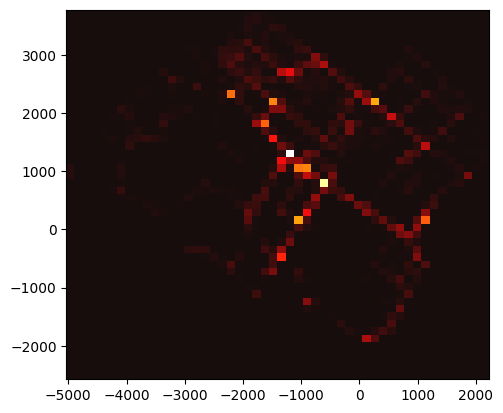

In [18]:
# original link: https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
heatmap, xedges, yedges = np.histogram2d(
    palo_alto_input_coordinates[:,0], palo_alto_input_coordinates[:,1], bins=50
    )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', alpha = 0.95)
plt.show()

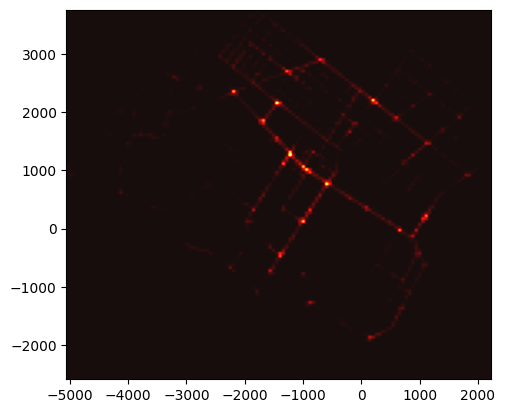

In [19]:
heatmap, xedges, yedges = np.histogram2d(
    palo_alto_output_coordinates[:,0], palo_alto_output_coordinates[:,1], bins=(128, 128)
    )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', alpha = 0.95)
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

<Figure size 1200x3600 with 0 Axes>

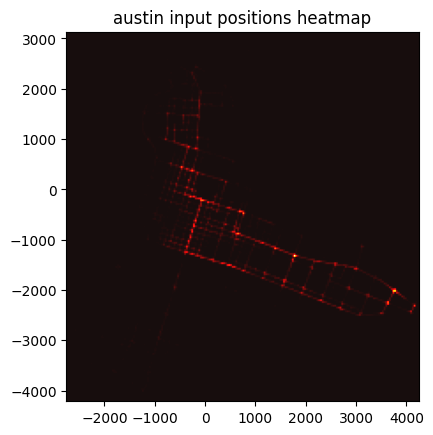

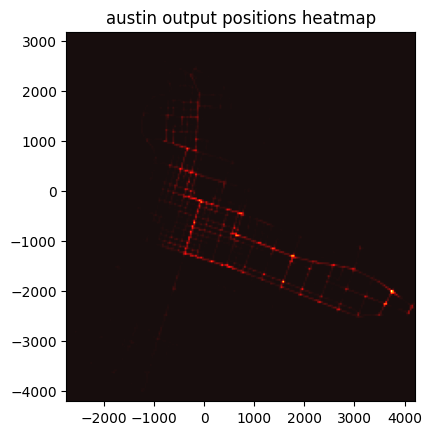

 17%|█▋        | 1/6 [00:03<00:18,  3.63s/it]

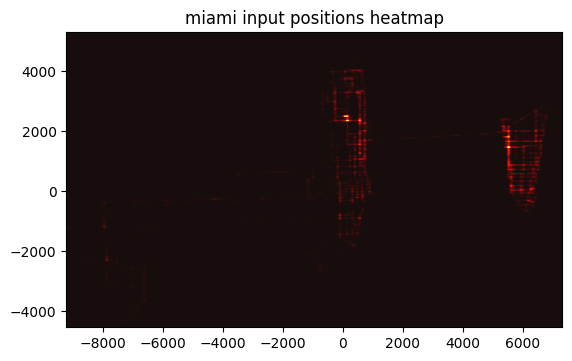

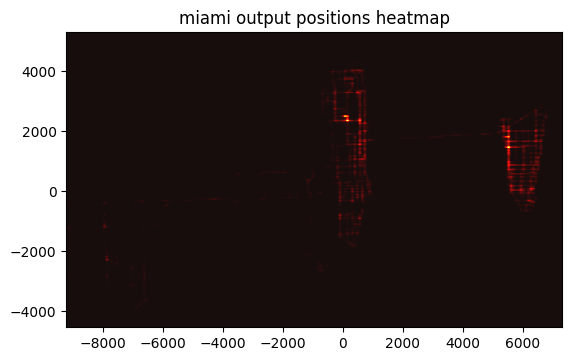

 33%|███▎      | 2/6 [00:07<00:15,  3.85s/it]

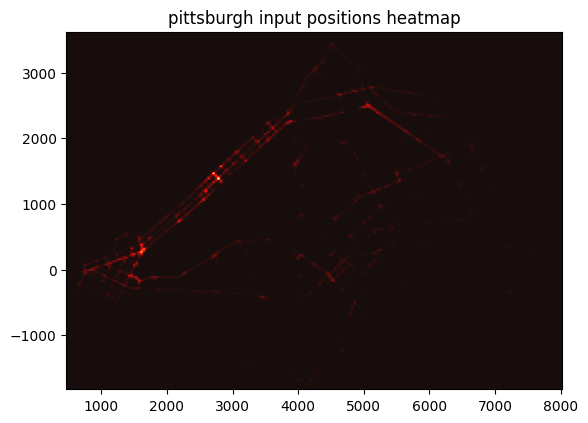

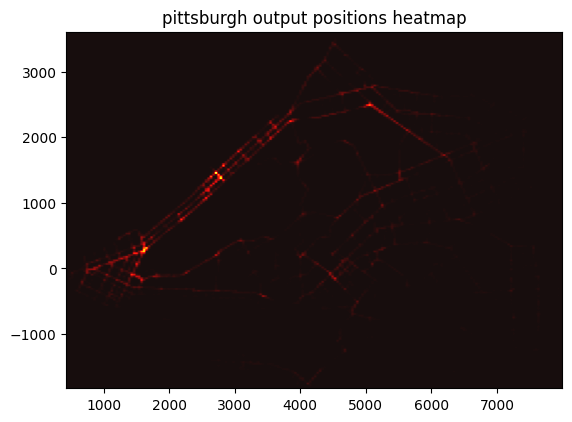

 50%|█████     | 3/6 [00:10<00:10,  3.59s/it]

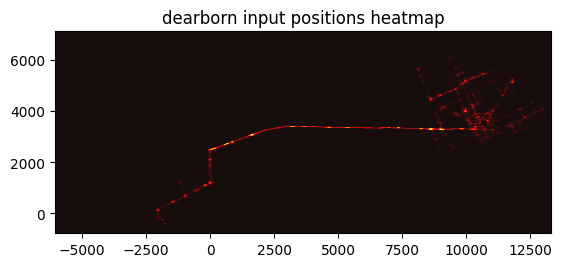

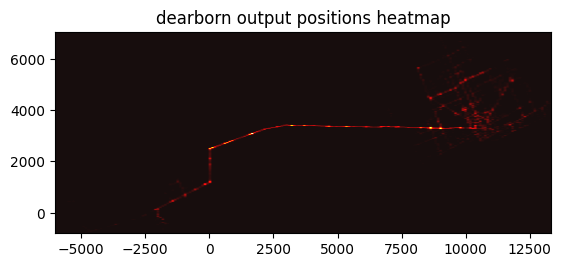

 67%|██████▋   | 4/6 [00:12<00:05,  2.94s/it]

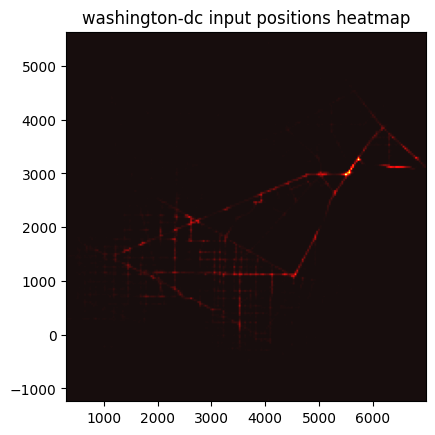

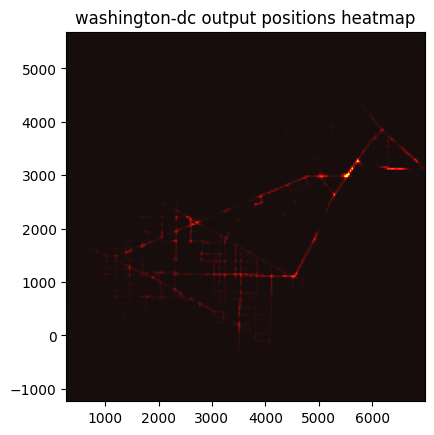

 83%|████████▎ | 5/6 [00:14<00:02,  2.65s/it]

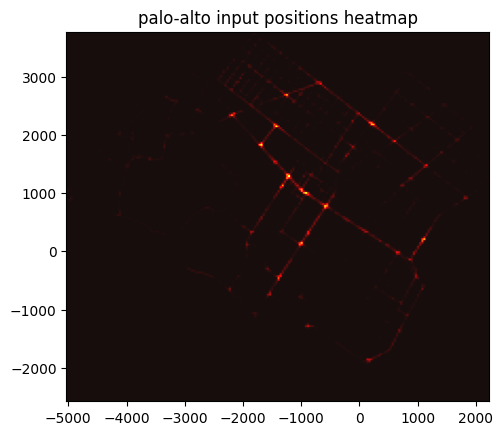

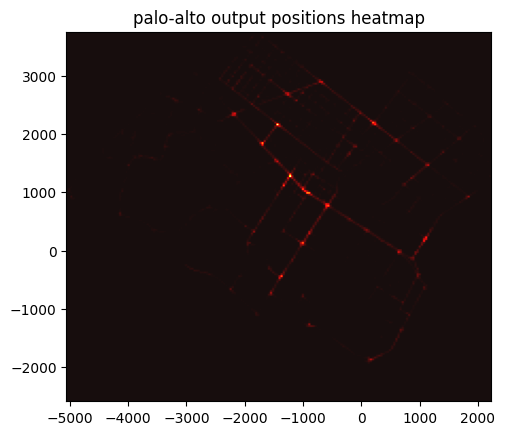

100%|██████████| 6/6 [00:16<00:00,  2.68s/it]


In [20]:
count = 1
row = 0
column = 0
plt.figure(figsize=(12, 36))
fig, ax = plt.subplots(6, 2)
fig.subplots_adjust(hspace = .5, wspace=.001)
for my_city in tqdm(cities):
    train_dataset  = ArgoverseDataset(city = my_city, split = split)
    input_coordinates = []
    output_coordinates = []
    for i in range(len(train_dataset.inputs)):
        input_coordinates.extend(train_dataset.__getitem__(i)[0])
        output_coordinates.extend(train_dataset.__getitem__(i)[1])
    input_coordinates = np.array(input_coordinates)
    output_coordinates = np.array(output_coordinates)

    plt.subplot(6, 2, count)
    heatmap, xedges, yedges = np.histogram2d(
        input_coordinates[:,0], input_coordinates[:,1], bins = (200, 200)
    )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.gca().imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', alpha = 0.95)
    plt.gca().title.set_text(f'{my_city} input positions heatmap')
    plt.show()

    count += 1

    plt.subplot(6, 2, count)
    heatmap, xedges, yedges = np.histogram2d(
        output_coordinates[:,0], output_coordinates[:,1], bins = (200, 200)
    )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.gca().imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', alpha = 0.95)
    plt.gca().title.set_text(f'{my_city} output positions heatmap')
    plt.show()

    count += 1

In [21]:
all_input_coordinates = []
all_output_coordinates = []
for my_city in tqdm(cities):
    train_dataset  = ArgoverseDataset(city = my_city, split = split)
    city_input_coordinates = []
    city_output_coordinates = []
    for i in range(len(train_dataset.inputs)):
        city_input_coordinates.extend(train_dataset.__getitem__(i)[0])
        city_output_coordinates.extend(train_dataset.__getitem__(i)[1])
    all_input_coordinates.extend(city_input_coordinates)
    all_output_coordinates.extend(city_output_coordinates)
all_input_coordinates = np.array(all_input_coordinates)
all_output_coordinates = np.array(all_output_coordinates)
print(all_input_coordinates.shape)
print(all_output_coordinates.shape)

100%|██████████| 6/6 [00:05<00:00,  1.09it/s]


(10190800, 2)
(12228960, 2)


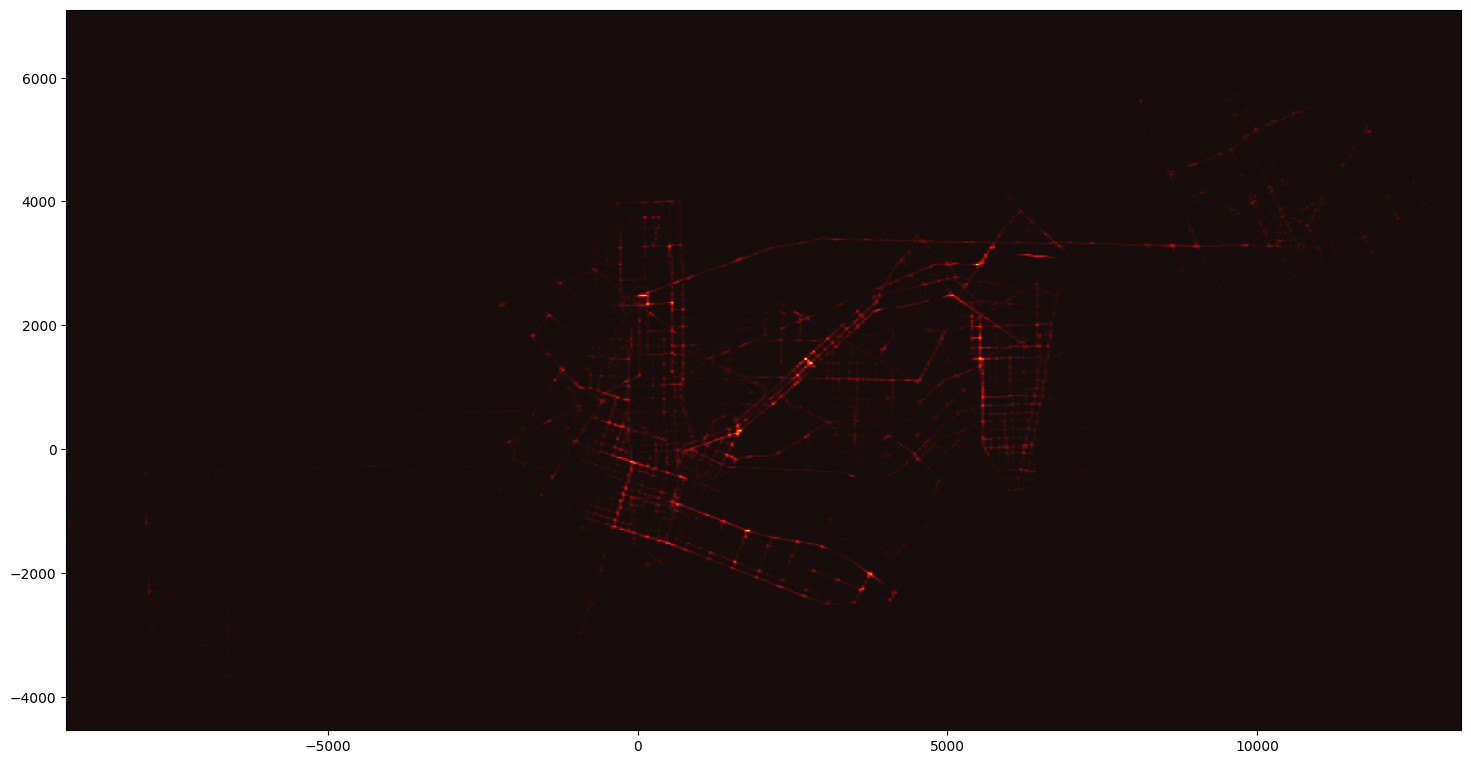

In [22]:
plt.figure(figsize=(18, 18))
heatmap, xedges, yedges = np.histogram2d(
        all_input_coordinates[:,0], all_input_coordinates[:,1], bins = (512, 512)
    )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', alpha = 0.95)
plt.show()

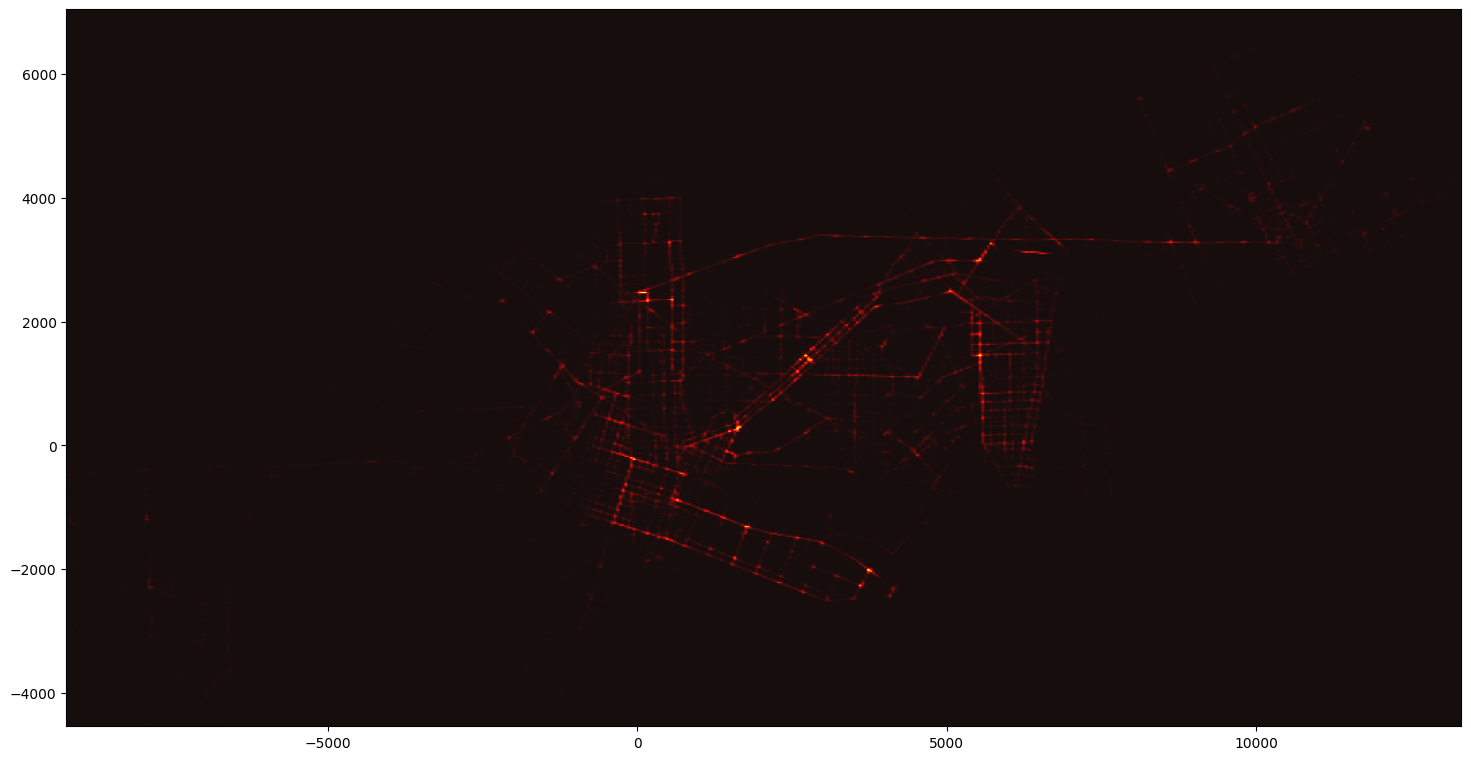

In [23]:
plt.figure(figsize=(18, 18))
heatmap, xedges, yedges = np.histogram2d(
        all_output_coordinates[:,0], all_output_coordinates[:,1], bins = (512, 512)
    )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower', alpha = 0.95, aspect='equal')
plt.show()

In [24]:
import seaborn as sns

100%|██████████| 6/6 [01:04<00:00, 10.81s/it]


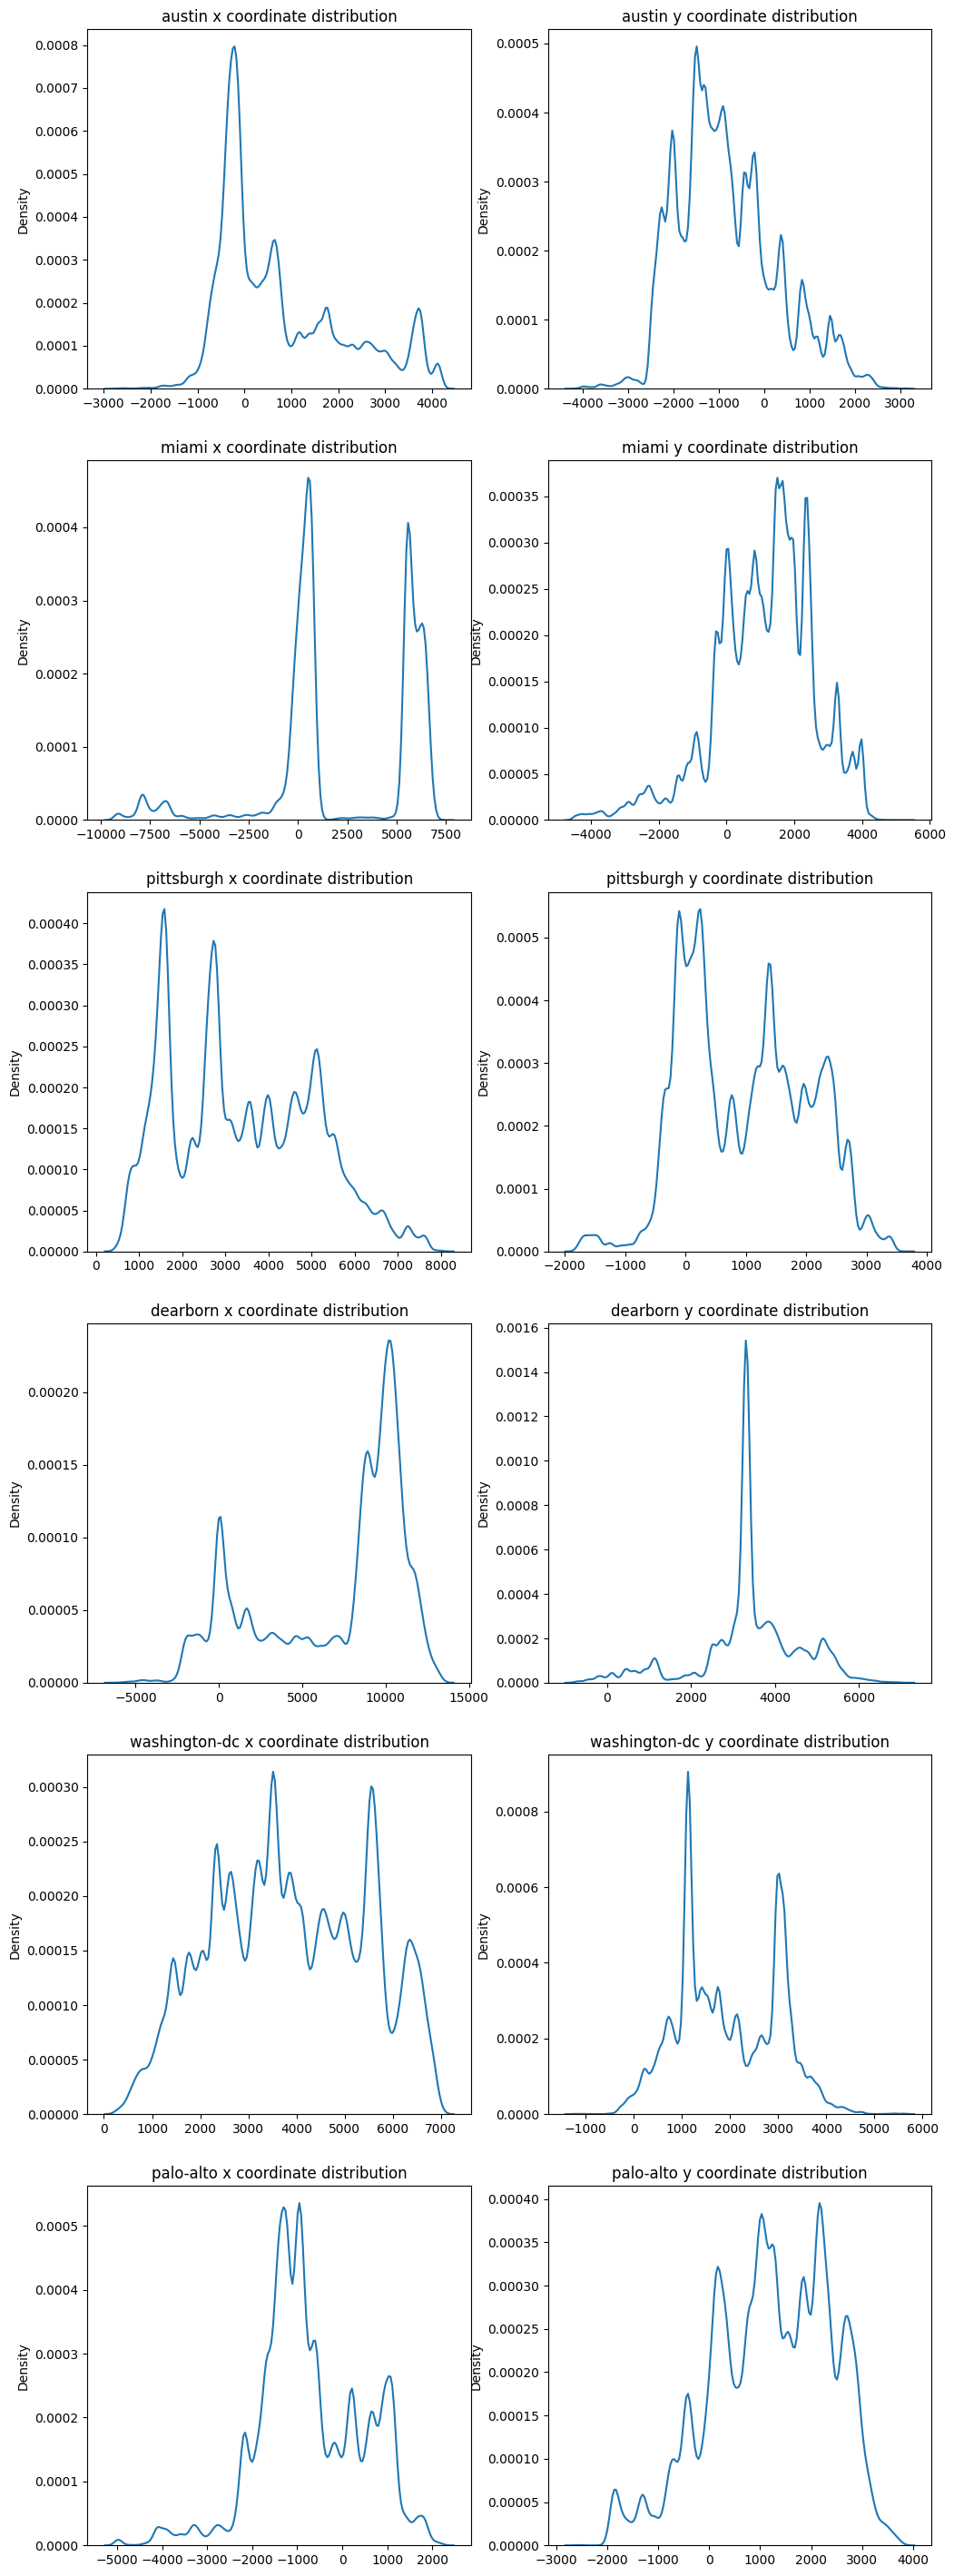

In [27]:
count = 1
plt.figure(figsize=(12, 36))
for my_city in tqdm(cities):

    train_dataset  = ArgoverseDataset(city = my_city, split = split)
    input_coordinates = []
    for i in range(len(train_dataset.inputs)):
        input_coordinates.extend(train_dataset.__getitem__(i)[0])
    input_coordinates = np.array(input_coordinates)

    plt.subplot(6, 2, count)
    
    sns.kdeplot(input_coordinates[:,0])

    plt.gca().set_title(f'{my_city} x coordinate distribution')

    count += 1

    plt.subplot(6, 2, count)

    sns.kdeplot(input_coordinates[:,1])
    
    plt.gca().set_title(f'{my_city} y coordinate distribution')

    count += 1
plt.show()

In [ ]:
sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

  0%|          | 0/6 [00:00<?, ?it/s]

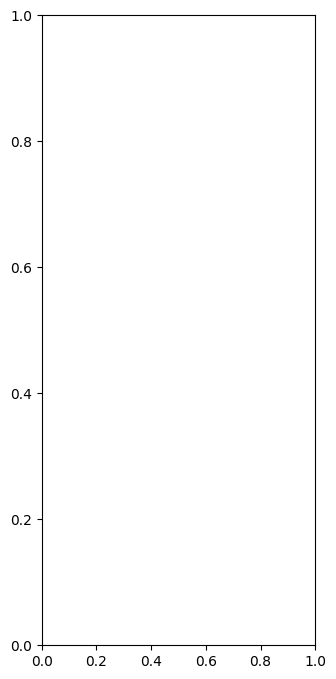

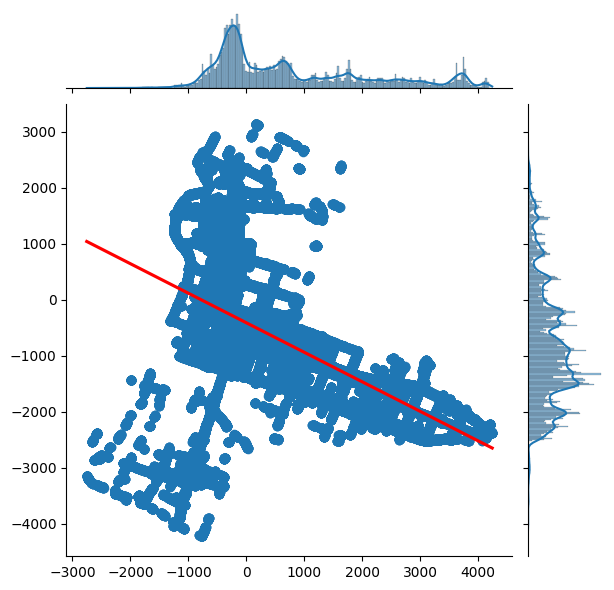

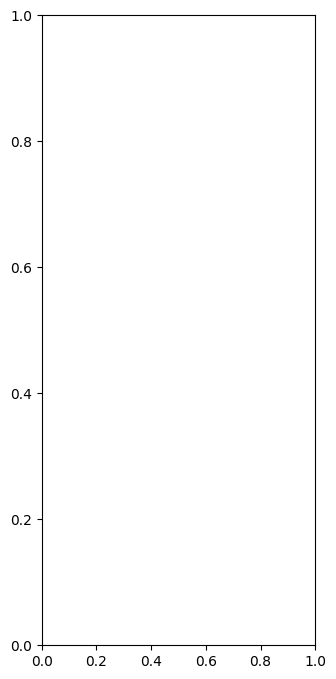

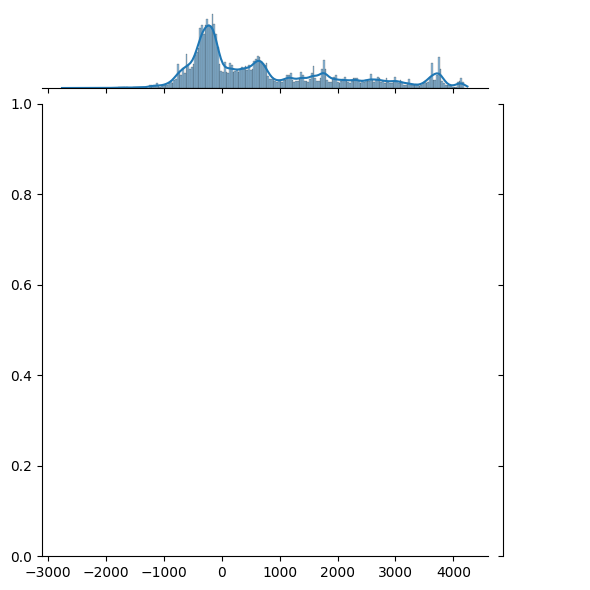

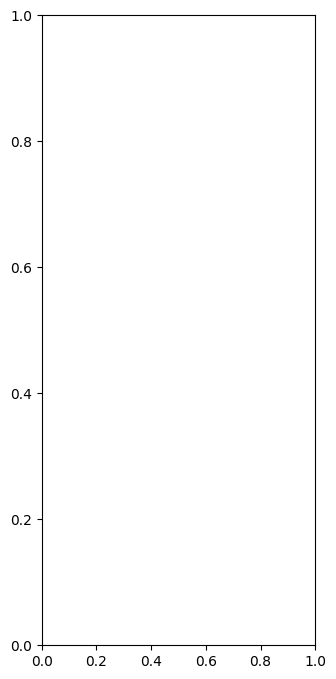

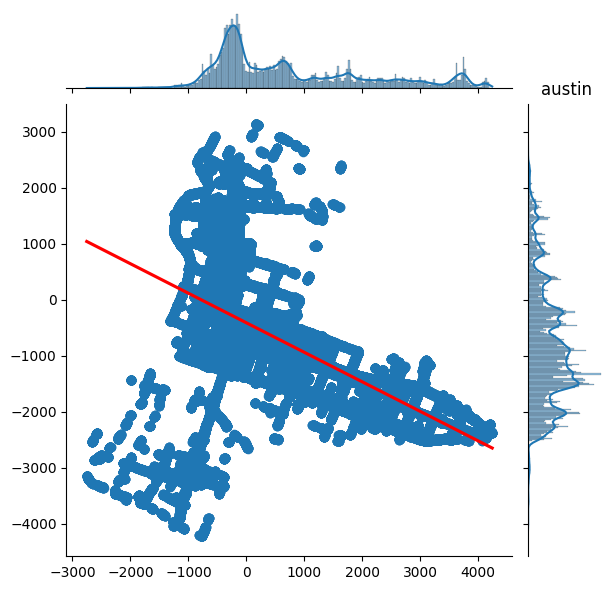

 17%|█▋        | 1/6 [03:08<15:41, 188.20s/it]

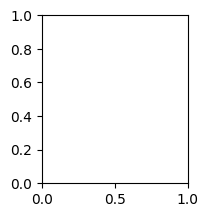

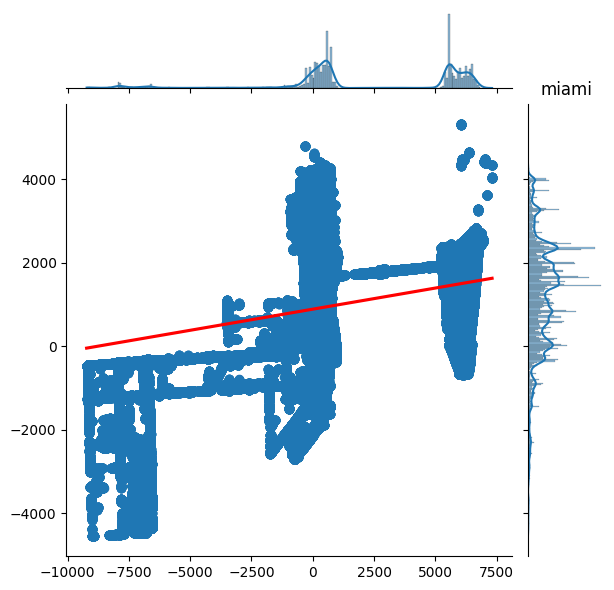

 33%|███▎      | 2/6 [07:06<14:29, 217.38s/it]

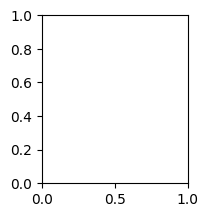

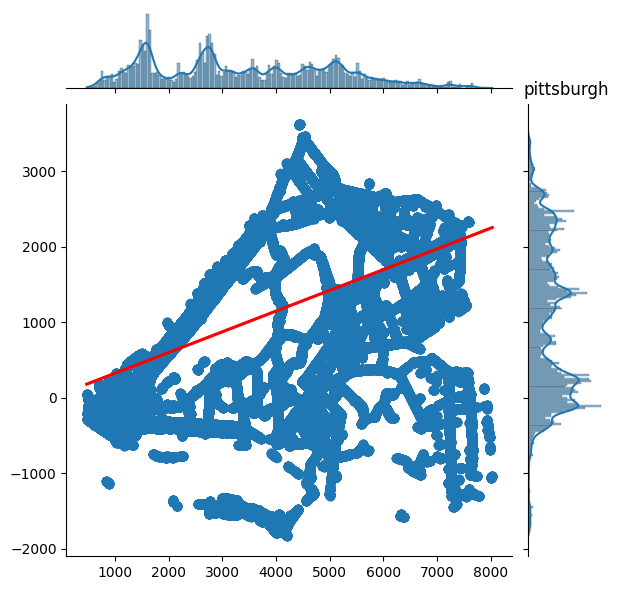

 50%|█████     | 3/6 [10:15<10:14, 204.81s/it]

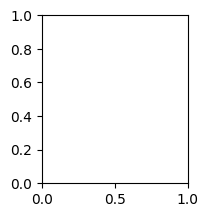

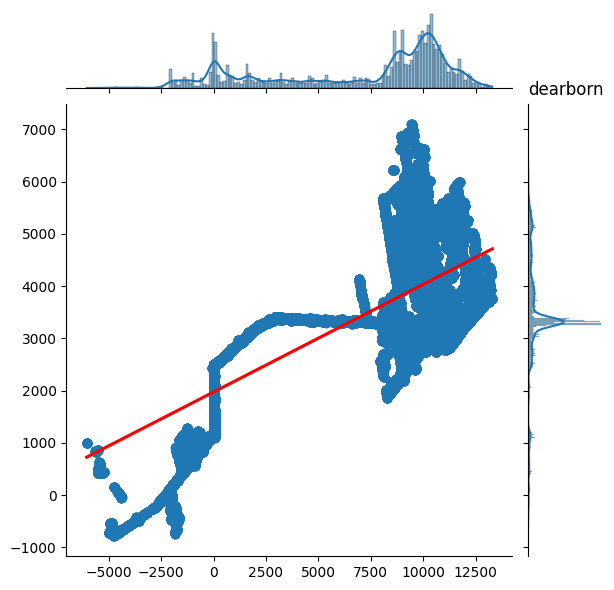

 67%|██████▋   | 4/6 [12:04<05:33, 166.68s/it]

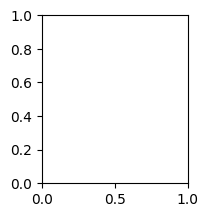

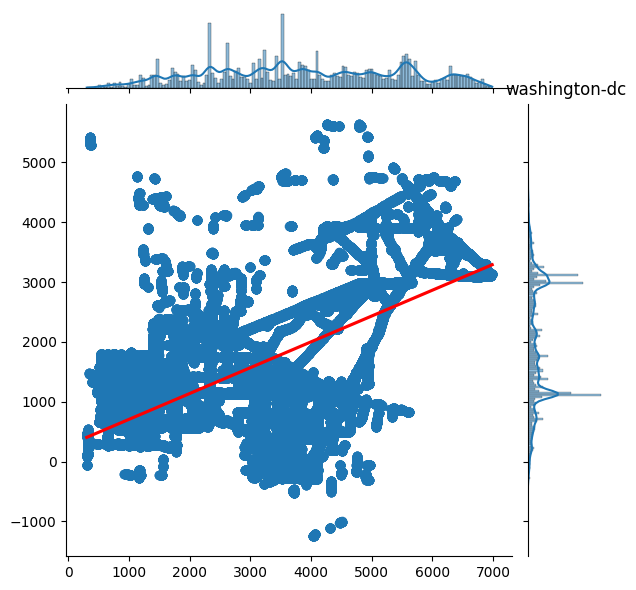

 83%|████████▎ | 5/6 [13:51<02:25, 145.37s/it]

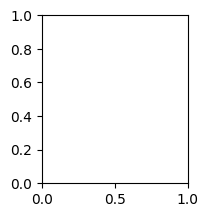

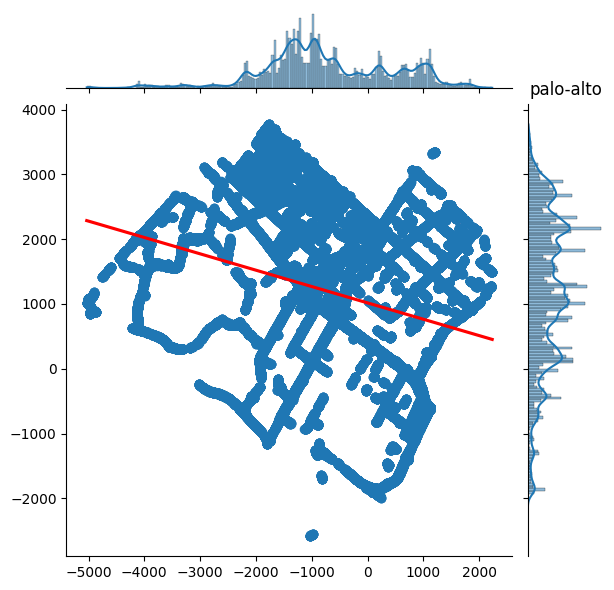

100%|██████████| 6/6 [14:41<00:00, 147.00s/it]


In [33]:
count = 1
plt.figure(figsize=(12, 18))
for my_city in tqdm(cities):

    train_dataset  = ArgoverseDataset(city = my_city, split = split)
    input_coordinates = []
    for i in range(len(train_dataset.inputs)):
        input_coordinates.extend(train_dataset.__getitem__(i)[0])
    input_coordinates = np.array(input_coordinates)

    plt.subplot(2, 3, count)
    
    sns.jointplot(
        x=input_coordinates[:,0], y=input_coordinates[:,1], 
        kind='reg', joint_kws={'line_kws':{'color':'red'}}
        )

    plt.gca().set_title(my_city)
    plt.show()

    count += 1